# Diagrama de Nyquist

##### Version 0.1

`Contenido Original creado por Ezequiel Leonardo Castaño`

<font color='Firebrick'>Este contenido está <b>INCOMPLETO</b> y puede estar incompleto y/o sufrir modificaciones</font>

Material faltante en este capítulo:
- Impacto de un controlador en el Diagrama de Nyquist
- Margen de ganancia y margen de Fase en Diagrama de Nyquist
- Referencias y Recursos Adicionales
- Diagrama de Nyquist en Simulink
- Sintonización basada en diagrama de Nyquist en Simulink

___

<nav style="display: flex; justify-content: space-evenly;">
    <a href="https://elc.github.io/control"><img src="https://img.shields.io/badge/Book-Chapters-blue?style=for-the-badge&amp;logo=GitBook&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab"><img src="https://img.shields.io/badge/Github-Repo-green?style=for-the-badge&amp;logo=github&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab/issues"><img src="https://img.shields.io/badge/Github%20Issues-Questions-orange?style=for-the-badge"></a>
</nav>

<br><nav style="display: flex; justify-content: space-between;">
    <a href="https://elc.github.io/link/control_08"><img src="https://img.shields.io/badge/%20%20%3C%20Previous%20Chapter--grey?style=for-the-badge"></a>
    <a href="https://elc.github.io/control"><img src="https://img.shields.io/badge/Home%20Page--grey?style=for-the-badge"></a>
</nav>

In [ ]:
%plot inline --format=png -w 1600 -h 800

In [2]:
format compact;

# Diagrama de Nyquist

El diagrama de Nyquist representa la salida del sistema para un $K$ determinado utilizando la salida en frecuencia.

## Fase Mínima vs Fase no Mínima
Los diagramas de Nyquist pueden aplicarse tanto a sistemas de fase mínima como sistemas de fase no mínima

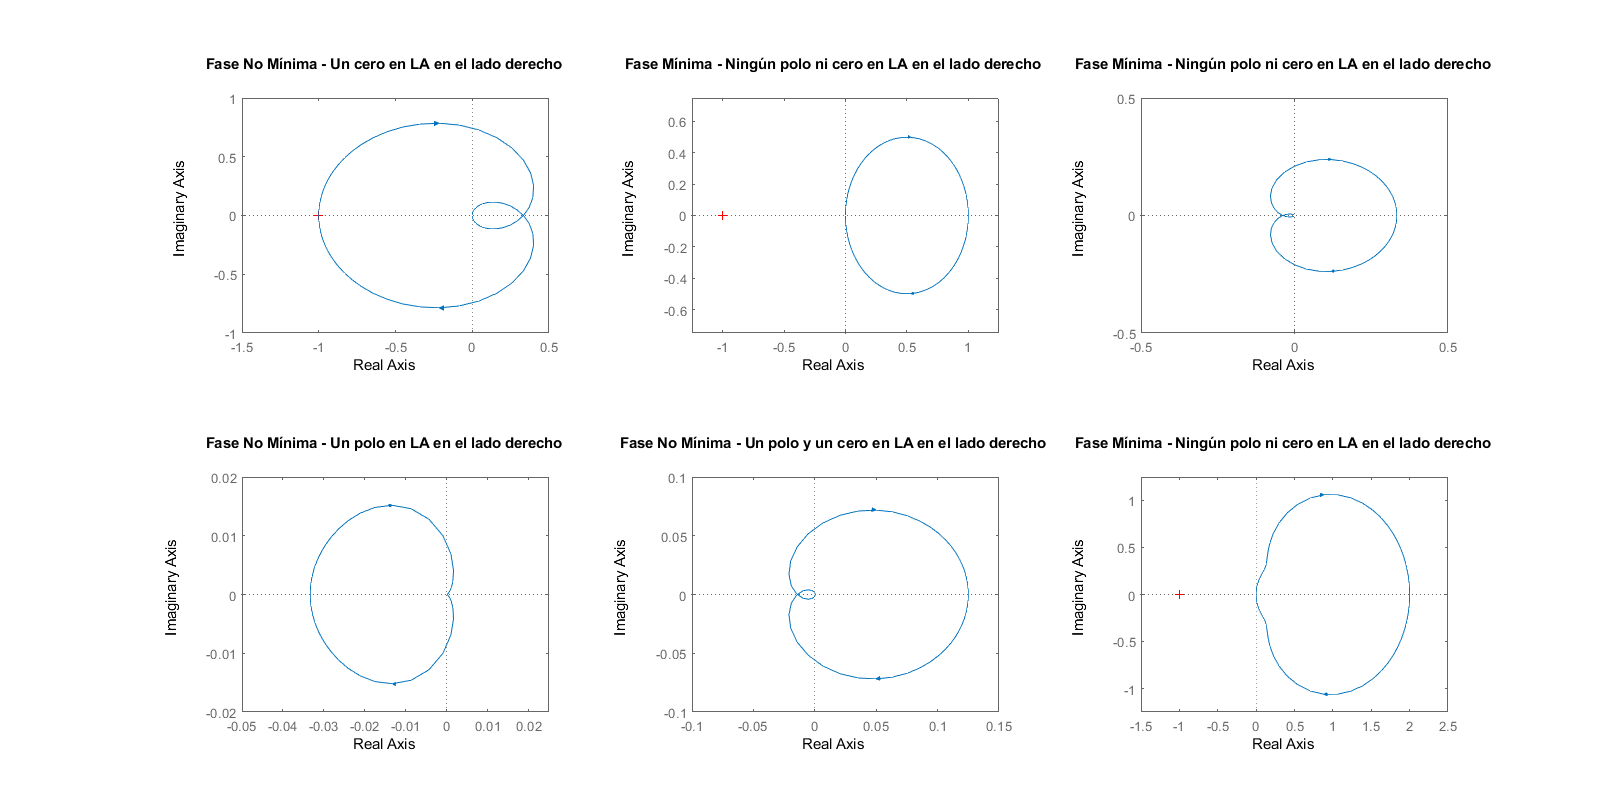

In [3]:
figure;
subplot(2, 3, 1)
sistema = zpk([2], [-1 -2], 1);
nyquist(sistema)
xlim([-1.5 0.5])
title("Fase No Mínima - Un cero en LA en el lado derecho")

subplot(2, 3, 2)
sistema = zpk([], [-1], 1);
nyquist(sistema)
xlim([-1.25 1.25])
ylim([-0.75 0.75])
title("Fase Mínima - Ningún polo ni cero en LA en el lado derecho")

subplot(2, 3, 3)
sistema = zpk([], [-1 -2 -1.5], 1);
nyquist(sistema)
xlim([-0.5 0.5])
ylim([-0.5 0.5])
title("Fase Mínima - Ningún polo ni cero en LA en el lado derecho")

subplot(2, 3, 4)
sistema = zpk([-8], [2 -5 -3 -2+2j -2-2j], 1);
nyquist(sistema)
xlim([-0.05 0.025])
ylim([-0.02 0.02])
title("Fase No Mínima - Un polo en LA en el lado derecho")

subplot(2, 3, 5)
sistema = zpk([2], [1 -1 -2 -2+2j -2-2j], 1);
nyquist(sistema)
xlim([-0.1 0.15])
ylim([-0.1 0.1])
title("Fase No Mínima - Un polo y un cero en LA en el lado derecho")

subplot(2, 3, 6)
sistema = zpk([-1+j; -1-j], [-1 -2 -0.5], 1);
nyquist(sistema)
xlim([-1.5 2.5])
ylim([-1.25 1.25])
title("Fase Mínima - Ningún polo ni cero en LA en el lado derecho")

## Propiedad de la suma de un escalar

Al sumar un escalar a la función de transferencia del sistema, no es fácil predecir como van a verse afectados los polos y ceros. Sin embargo, al utilizar un diagrama de Nyquist, se produce una traslación y es más sencillo evaluar la estabilidad.

In [4]:
%plot inline --format=svg -w 1600 -h 500

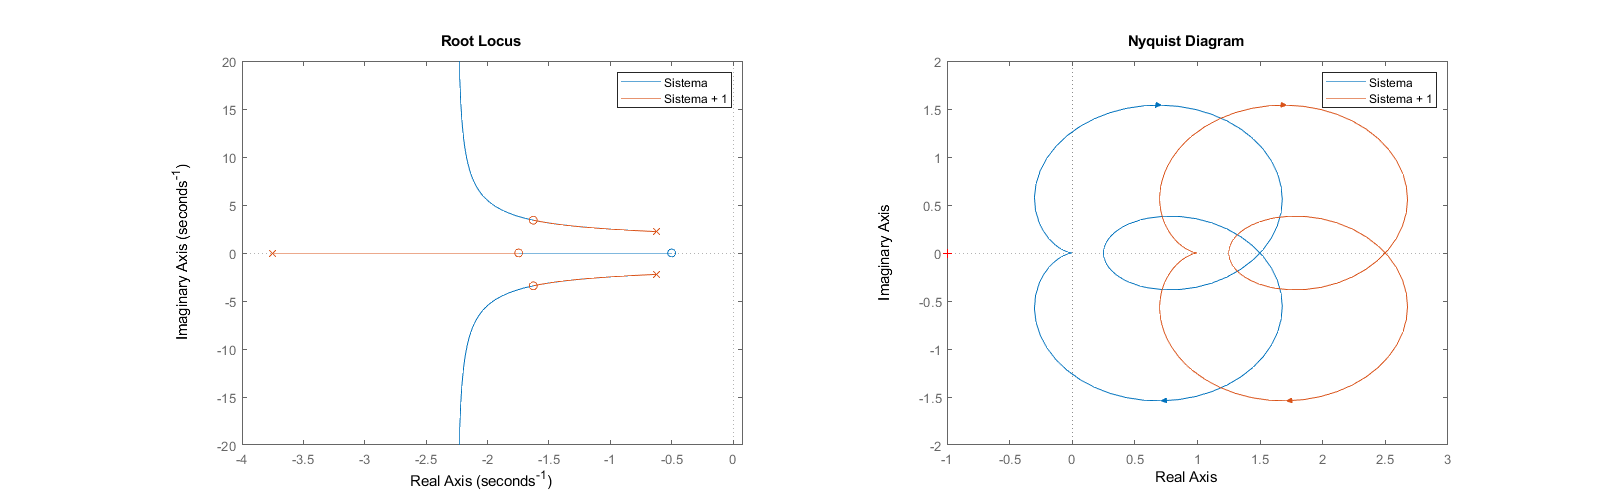

In [5]:
sistema = tf([10 5], [1 5 10 20]);

figure;
subplot(1, 2, 1)
rlocus(sistema, sistema+1)
legend("Sistema", "Sistema + 1")

subplot(1, 2, 2)
nyquist(sistema, sistema+1)
legend("Sistema", "Sistema + 1")

## Criterio General de Nyquist

El criterio general de estabilidad de Nyquist puede representarse con la siguiente ecuación

$$Z=N+P$$

$Z$: Cantidad de **polos del sistema }a la derecha del eje imaginario

$N$: Cantidad de rodeos al punto $(-1,0)$, si es en sentido horario es positivo y si es antihorario negativo

$P$: Cantidad de **polos en lazo abierto} a la derecha del eje imaginario

### Interpretación

Si el sistema es **estable}, entonces $Z=0$

Si los rodeos al punto $(-1,0)$ ocurren en sentido **horario}, el sistema es inestable, ya que $P$ no puede ser negativo.

Si el sistema es de **fase mínima}, entonces $P=0$. Por lo tanto, para que el sistema sea estable, **no tiene que haber rodeos} al punto $(-1,0)$, es decir $N=0$

Si el sistema es de **fase no mínima}, pero no tiene polos en lazo abierto a la derecha del eje imaginario, entonces $P=0$. Por lo tanto, para que el sistema sea estable, **no tiene que haber rodeos} al punto $(-1,0)$, es decir $N=0$

Si el sistema es de **fase no mínima }con polos a la derecha del eje imaginario, entonces $P\not= 0$. Por lo tanto, para que el sistema sea estable se tienen que dar exactamente $P$ rodeos al punto $(-1,0)$ en sentido **antihorario}.

## Ejemplo con Fase Mínima

Al ser de fase mínima, $P=0$ y para que el sistema sea estable se requiere que no haya encierros las punto $(-1,0)$. 

In [6]:
%plot inline --format=png -w 2000 -h 1000

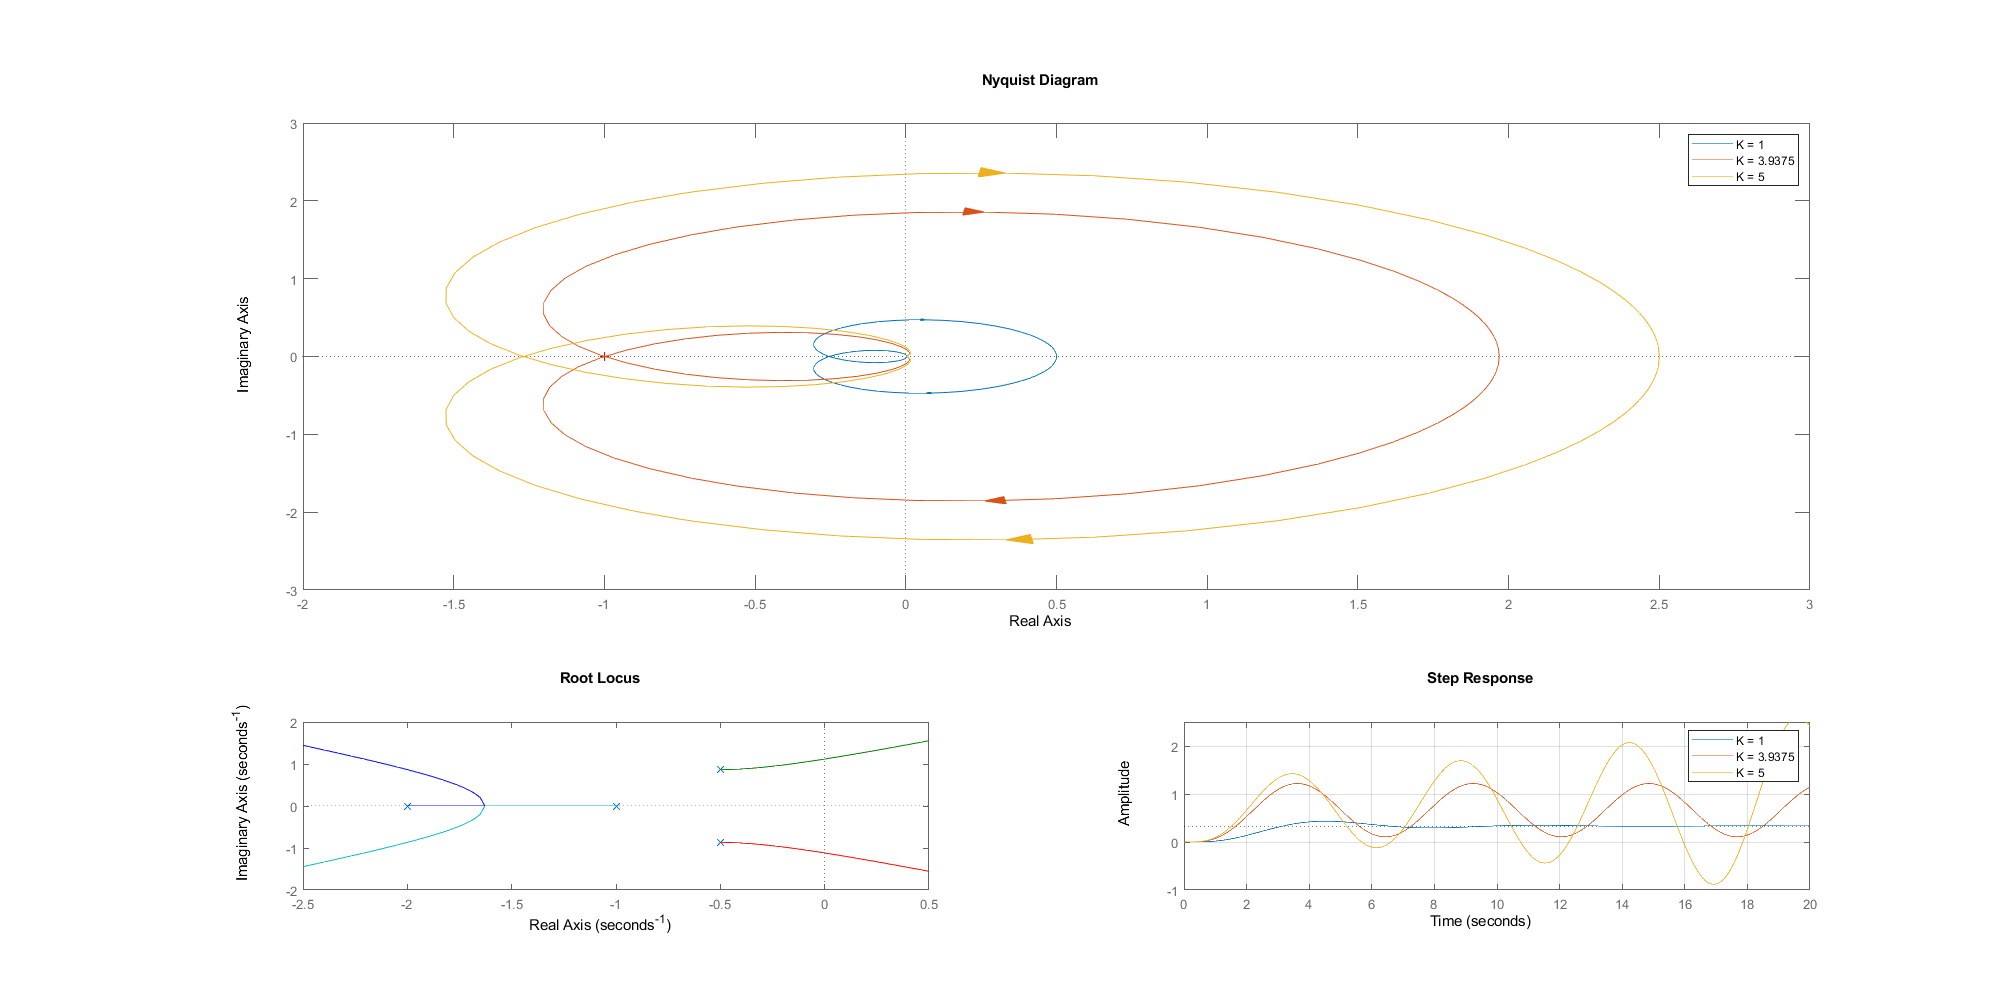

In [7]:
sistema = tf([1], [1 4 6 5 2]);

figure;

subplot(3, 2, [1 2 3 4])
nyquist(sistema, 3.9375*sistema, 5*sistema)
ylim([-3 3])
xlim([-2 3])
legend("K = 1", "K = 3.9375", "K = 5")

subplot(3, 2, 5)
rlocus(sistema)
ylim([-2 2])
xlim([-2.5 0.5])

subplot(3, 2, 6)
lazo_cerrado_1 = feedback(sistema, 1);
lazo_cerrado_2 = feedback(3.9375*sistema, 1);
lazo_cerrado_3 = feedback(5*sistema, 1);
tiempo = 0:0.02:20;

step(lazo_cerrado_1, lazo_cerrado_2, lazo_cerrado_3, tiempo )
ylim([-1 2.5])
xlim([0 20])
grid on
legend("K = 1", "K = 3.9375", "K = 5")

## Ejemplo Sistema Fase No Mínima con $P=0$

Al tener un cero a la derecha del eje imaginario, este sistema es de fase no mínima, pero al no tener polos en lazo abierto a la derecha del eje imaginario, $P=0$. Por lo tanto para que el sistema sea estable es necesario que $N=0$, esto quiere decir que no debe haber encierros al punto $(-1,0)$, ni en sentido horario ni antihorario.

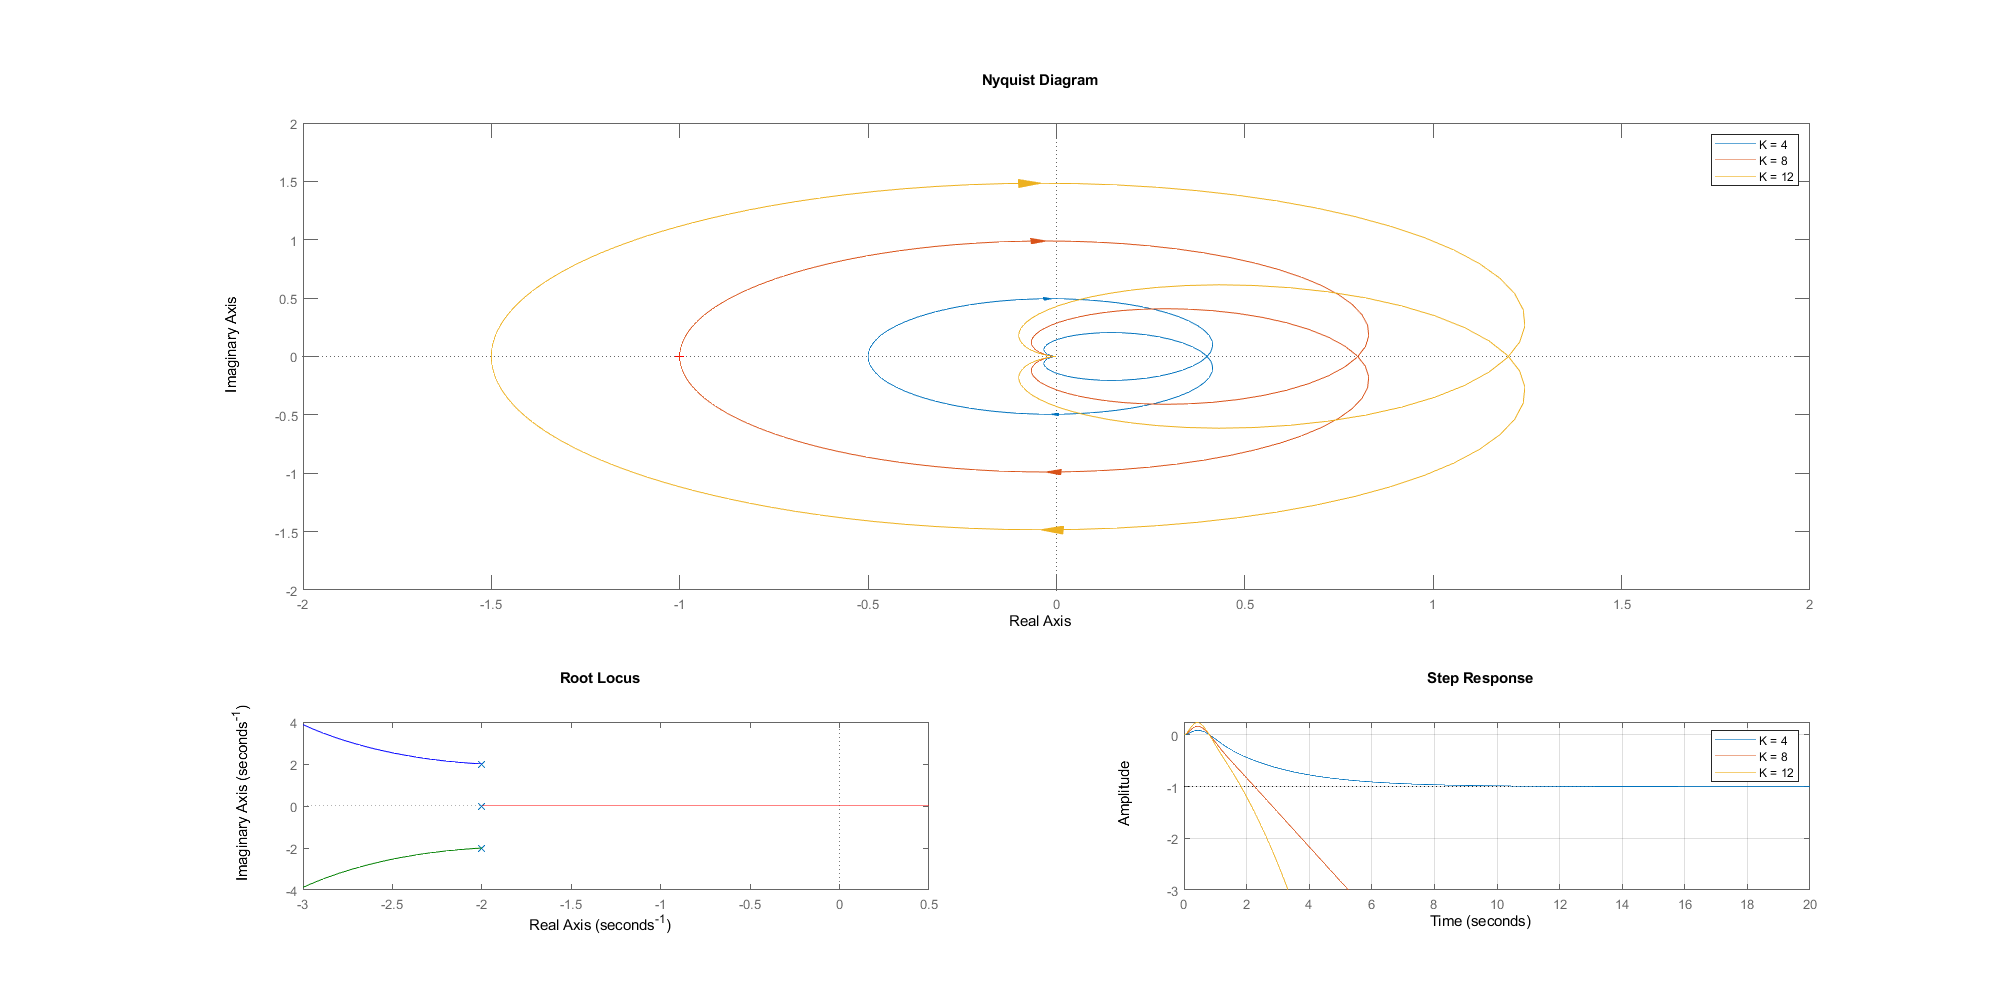

In [8]:
[num, den] = zp2tf([2], [-2 -2+2j -2-2j], 1);
sistema = tf(num, den);

figure;

subplot(3, 2, [1 2 3 4])
frequency = logspace(-10,10, 1000);
nyquist(4*sistema, 8*sistema, 12*sistema, frequency)
xlim([-2 2])
ylim([-2 2])
legend("K = 4", "K = 8", "K = 12")

subplot(3, 2, 5)
rlocus(sistema)
xlim([-3 0.5])
ylim([-4 4])

subplot(3, 2, 6)
lazo_cerrado_1 = feedback(4*sistema, 1);
lazo_cerrado_2 = feedback(8*sistema, 1);
lazo_cerrado_3 = feedback(12*sistema, 1);
tiempo = 0:0.02:20;

step(lazo_cerrado_1, lazo_cerrado_2, lazo_cerrado_3, tiempo)

ylim([-3 0.25])
xlim([0 20])
legend("K = 4", "K = 8", "K = 12")

grid on

## Ejemplo Sistema Fase No Mínima con $P\not= 0$

En este caso $P=1$, por lo tanto, para que el sistema sea estable es necesario que $N=-1$, es decir, que el punto $(-1,0)$ tenga un encierro en sentido antihorario. En el Root Locus puede verse como hay dos potenciales valores críticos de $K$, uno de ellos se encuentra en $\frac{123}{8}$ y el otro en $\approx 52.5134$. Se puede ver como al probar con valores de $K$ menores y mayores, como el diagrama de Nyquist refleja la estabilidad, inestabilidad y estabilidad crítica del sistema.

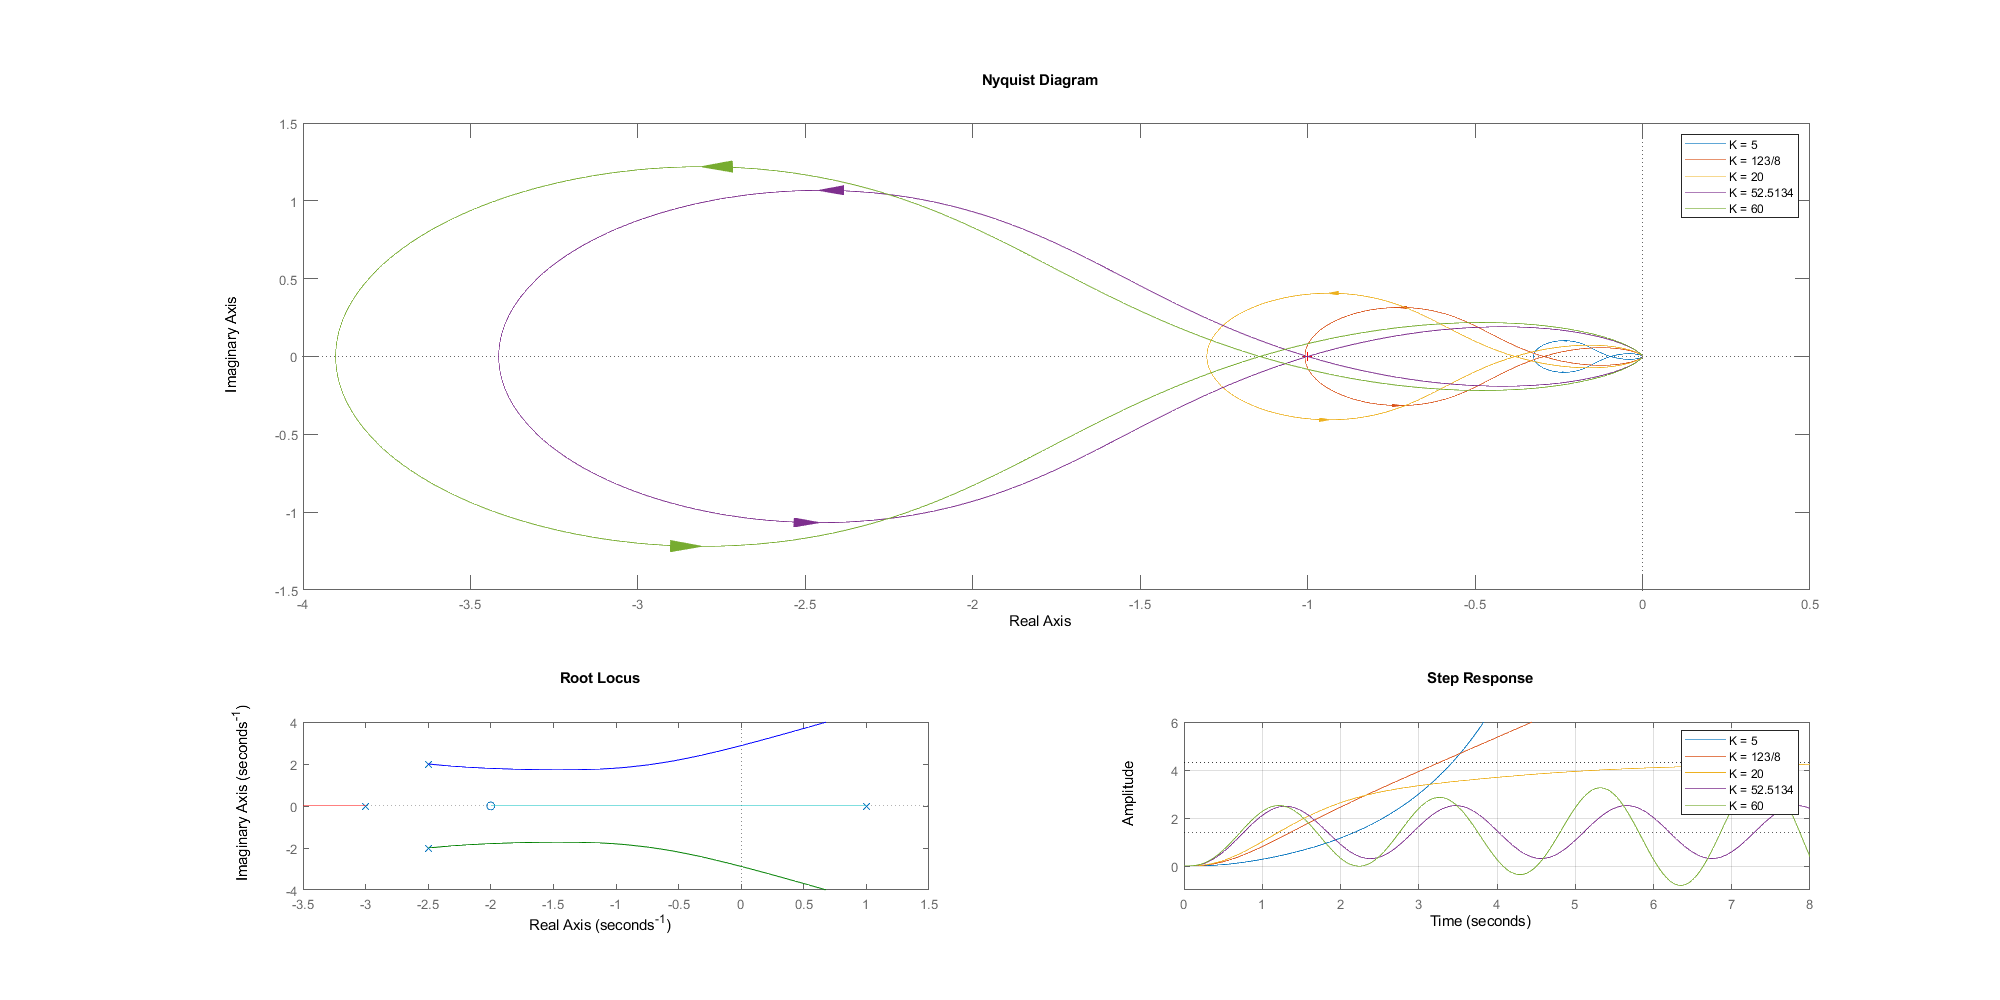

In [9]:
ceros = transpose([-2]);
polos = [-3 1 -2.5+2j -2.5-2j];
[num, den] = zp2tf(ceros, polos, [1]);
sistema = tf(num, den);

figure;

subplot(3, 2, [1 2 3 4])
frequency = logspace(-10,10, 5000);
nyquist(5*sistema, 124/8*sistema, 20*sistema, 52.5134*sistema, 60*sistema, frequency)
xlim([-4 0.5])
ylim([-1.5 1.5])
legend("K = 5", "K = 123/8", "K = 20", "K = 52.5134", "K = 60")

subplot(3, 2, 5)
rlocus(sistema)
xlim([-3.5 1.5])
ylim([-4 4])

subplot(3, 2, 6)
lazo_cerrado_1 = feedback(5*sistema, 1);
lazo_cerrado_2 = feedback(124/8*sistema, 1);
lazo_cerrado_3 = feedback(20*sistema, 1);
lazo_cerrado_4 = feedback(52.5134*sistema, 1);
lazo_cerrado_5 = feedback(60*sistema, 1);
tiempo = 0:0.02:20;
step(lazo_cerrado_1, lazo_cerrado_2, lazo_cerrado_3, lazo_cerrado_4, lazo_cerrado_5, tiempo )
ylim([-1 6])
xlim([0 8])
grid on
legend("K = 5", "K = 123/8", "K = 20", "K = 52.5134", "K = 60")

## Ejemplo Sistema Inestable Fase No Mínima con $P\not= 0$

En este caso $P=1$ por lo tanto para que el sistema sea estable $N$ tiene que ser -1, es decir, debe dar exactamente un encierro en sentido antihorario al punto $(-1,0)$. Sin embargo, como se puede ver en las gráficas, para distintos valores de $K$ el diagrama de Nyquist tiene o 0 encierros o una cantidad positiva de encierros, ya que las curvas van siempre en sentido horario.

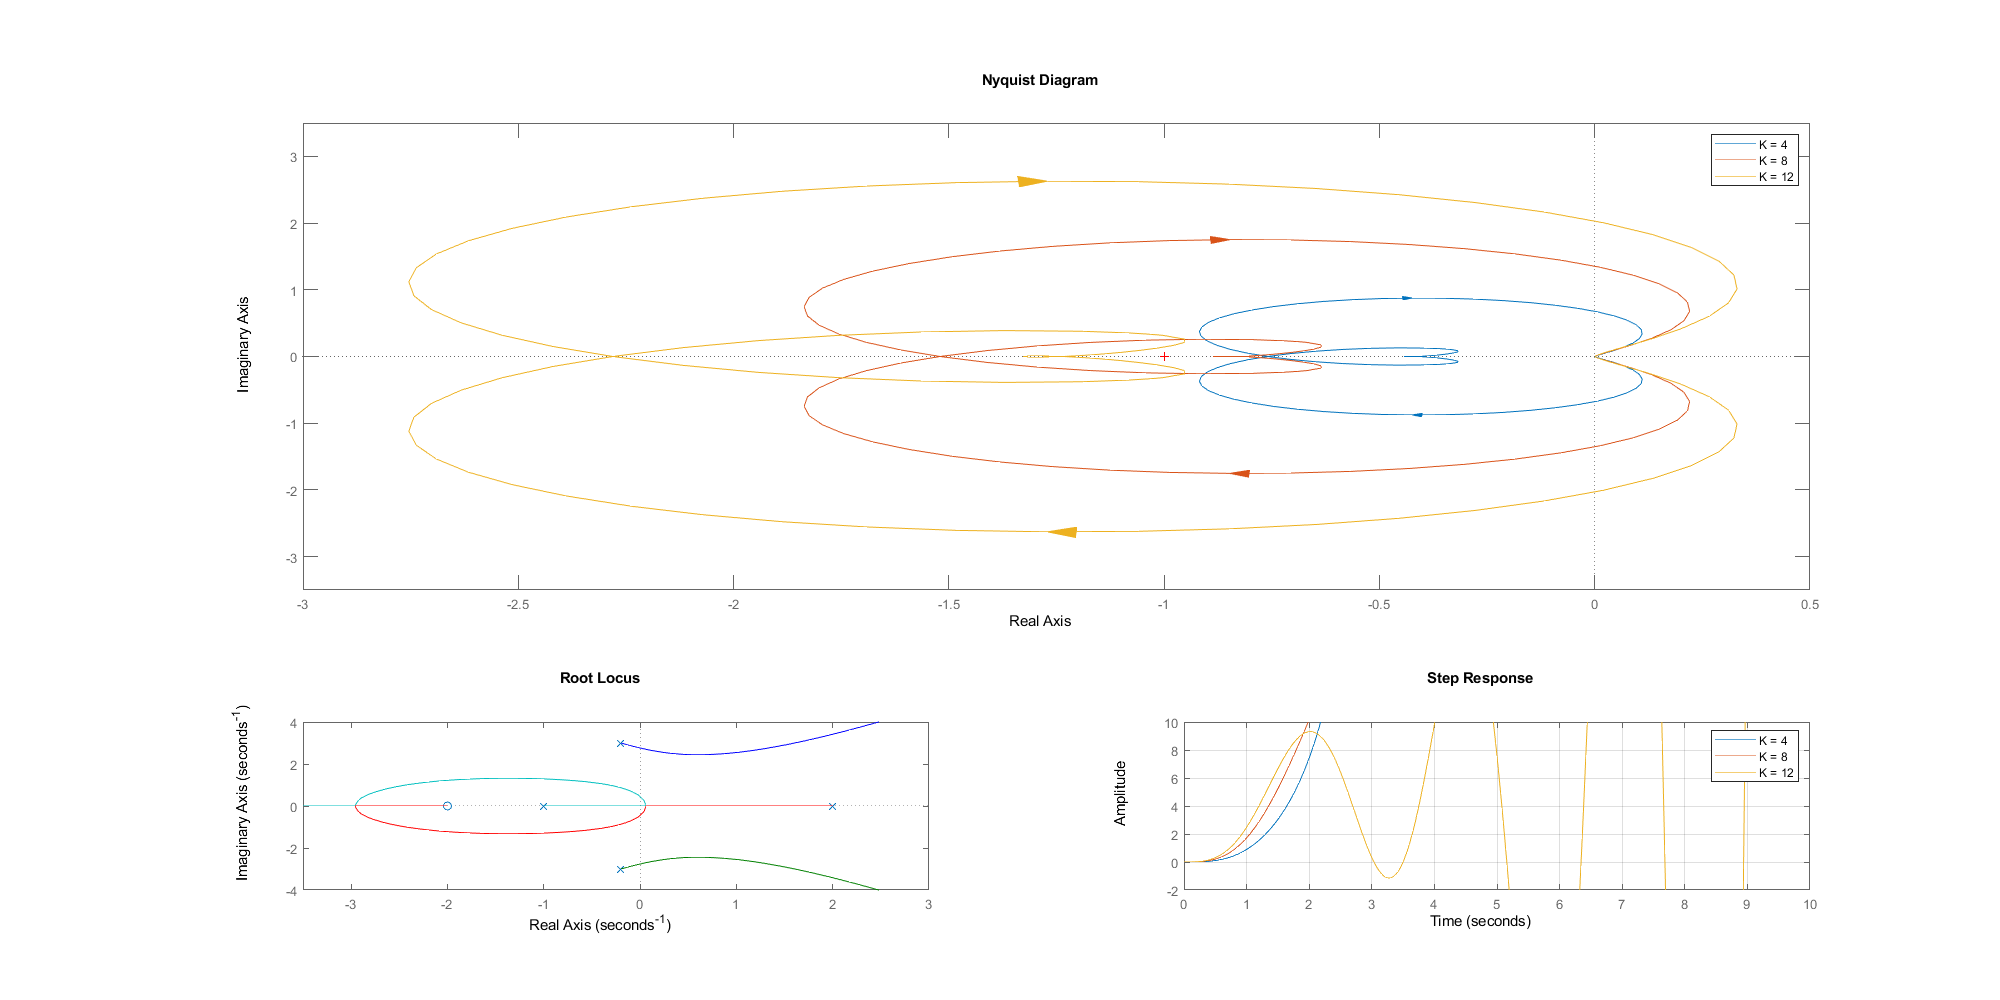

In [10]:
ceros = [-2];
polos = [-1 2 -0.2+3j -0.2-3j];
[num, den] = zp2tf(ceros, polos, [1]);
sistema = tf(num, den);

figure;

subplot(3, 2, [1 2 3 4])
nyquist(4*sistema, 8*sistema, 12*sistema)
xlim([-3 0.5])
ylim([-3.5 3.5])
legend("K = 4", "K = 8", "K = 12")

subplot(3, 2, 5)
rlocus(sistema)
xlim([-3.5 3])
ylim([-4 4])

subplot(3, 2, 6)
lazo_cerrado_1 = feedback(4*sistema, 1);
lazo_cerrado_2 = feedback(8*sistema, 1);
lazo_cerrado_3 = feedback(12*sistema, 1);
tiempo = 0:0.02:20;
step(lazo_cerrado_1, lazo_cerrado_2, lazo_cerrado_3, tiempo )
ylim([-2 10])
xlim([0 10])
legend("K = 4", "K = 8", "K = 12")
grid on

<br><nav style="display: flex; justify-content: space-between;">
    <a href="https://elc.github.io/link/control_08"><img src="https://img.shields.io/badge/%20%20%3C%20Previous%20Chapter--grey?style=for-the-badge"></a>
    <a href="https://elc.github.io/control"><img src="https://img.shields.io/badge/Home%20Page--grey?style=for-the-badge"></a>
</nav>